# **A Smart Alarm for Particle Accelerator Beamline Operations**
*Chris Tennant, Brian Freeman, Reza Kazimi, Daniel Moser (Jefferson Lab)* </br>
*Dan Abell, Jonathan Edelen, Joshua Einstein-Curtis (RadiaSoft LLC)*

contact: tennant@jlab.org

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

import tensorflow
import tensorflow.keras as keras

### read in test data

In [2]:
s_test = pd.read_csv('./data/test/settings_test.csv')
r_test = pd.read_csv('./data/test/readings_test.csv')

### load model

In [3]:
inv_model = keras.models.load_model('./model/inverse_model')

***

## MODEL PERFORMANCE

### use model to generate predicted settings

In [4]:
s_fit = pd.DataFrame(inv_model.predict(r_test), columns=list(s_test.columns.values))

590/590 [==============================] - 1s 1ms/step


### create Fig. 3 in paper

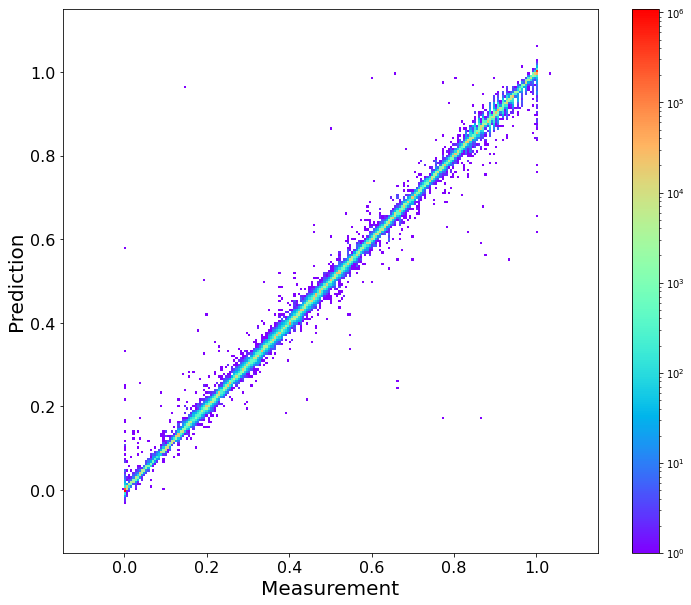

In [5]:
plt.figure(figsize=(12,10))
plt.hist2d(s_test.values.flatten(), s_fit.values.flatten(),
           bins = 200, 
           norm = colors.LogNorm(), 
           cmap = "rainbow")
plt.colorbar()
plt.xlabel(r'Measurement', fontsize=20)
plt.ylabel(r'Prediction', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlim(-0.15,1.15)
plt.ylim(-0.15,1.15)

plt.show()

***

## SIMULATED MODEL PERFORMANCE

### read in data to simulate deployed performance

In [6]:
s_simulate = pd.read_csv('./data/simulate/settings_simulate.csv')
r_simulate = pd.read_csv('./data/simulate/readings_simulate.csv')

### use model to generate predicted settings

In [7]:
s_simulate_fit = pd.DataFrame(inv_model.predict(r_simulate), columns=list(s_simulate.columns.values))

23/23 [==============================] - 0s 1ms/step


### create Fig. 4 in paper

#####  note that setting the random seed in t-SNE will create similar, but *not* exactly the same, plots each time the cell 10 is executed

In [8]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#### use PCA to do initial dimensionality reduction before invoking t-SNE

In [9]:
pca_24 = PCA(n_components=24)
pca_result_24 = pca_24.fit_transform(r_simulate)

print("Cumulative variance explained by 24 principal components: {:.4f}".format(np.sum(pca_24.explained_variance_ratio_)))

Cumulative variance explained by 24 principal components: 0.9675


In [10]:
RS = 123
pca_tsne = TSNE(n_components=2, perplexity=35, early_exaggeration=12, learning_rate=200, n_iter=1000, method='barnes_hut', random_state=RS).fit_transform(pca_result_24)

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


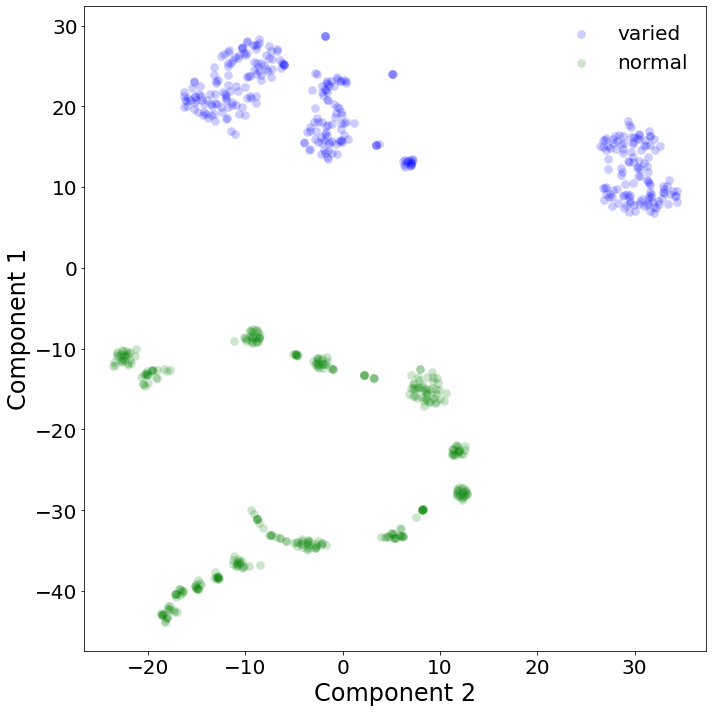

In [11]:
plt.figure(figsize = (10,10))

plt.scatter(pca_tsne[0:353,0], pca_tsne[0:353,1], lw=0, c='blue', s=75, alpha=0.2, label='varied')
plt.scatter(pca_tsne[354:708,0], pca_tsne[354:708,1], c='green', lw=0, s=75, alpha=0.2, label='normal')
plt.legend(frameon=False, fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Component 1', fontsize=24);
plt.xlabel('Component 2', fontsize=24);
plt.tight_layout()

plt.show()

***